<a href="https://colab.research.google.com/github/marielaoviedo/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre , numero dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible values for columns
materias = ['Matemática', 'Lengua', 'Historia', 'Geografía', 'Ciencias Naturales', 'Ciencias Sociales', 'Educación Física', 'Inglés', 'Tecnología', 'Artes']
apellidos = ['Gonzalez', 'Rodriguez', 'Perez', 'Gomez', 'Fernandez', 'Lopez', 'Martinez', 'Sanchez', 'Romero', 'Torres']
nombres = ['Sofia', 'Mateo', 'Martina', 'Benjamin', 'Valentina', 'Lautaro', 'Emma', 'Thiago', 'Olivia', 'Santino']


# Generate data
num_filas = 100
data = []
for _ in range(num_filas):
    apellido = random.choice(apellidos)
    nombre = random.choice(nombres)
    dni = random.randint(10000000, 99999999)  # Simulate DNI
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 20)
    data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])


# Create DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Print the DataFrame
df

,Apellido,Nombre,DNI,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Gonzalez,Mateo,80488144,Ciencias Naturales,5,5,1,10
1,Fernandez,Benjamin,87739208,Inglés,6,3,4,15
2,Gomez,Olivia,38838250,Tecnología,5,7,9,20
3,Romero,Emma,43545710,Inglés,9,9,4,11
4,Rodriguez,Martina,36382030,Matemática,1,2,2,1
...,...,...,...,...,...,...,...,...
95,Gonzalez,Sofia,32868386,Artes,5,6,7,15
96,Torres,Thiago,64027184,Inglés,6,10,7,6
97,Romero,Olivia,70664705,Matemática,8,2,2,20
98,Sanchez,Emma,65394363,Ciencias Sociales,5,10,4,20


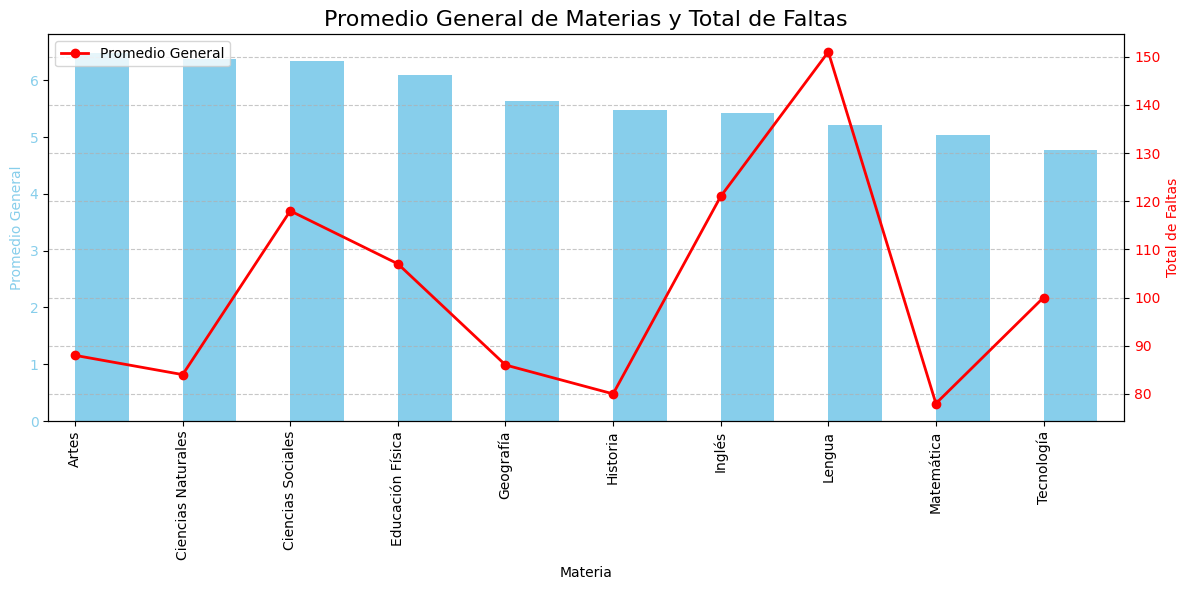

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby('Materia')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1).sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia')['Faltas a clases'].sum()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average grades
average_grades.plot(kind='bar', ax=ax1, color='skyblue', position=0)
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for absences
ax2 = ax1.twinx()
total_absences.plot(kind='line', ax=ax2, marker='o', color='red', linewidth=2)
ax2.set_ylabel('Total de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and labels
plt.title('Promedio General de Materias y Total de Faltas', fontsize=16)
plt.xlabel('Materia', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, ['Promedio General'] + labels2, loc='upper left')


# Customize the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [4]:
df.to_csv("datos_alumnos.csv", index=False)